In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sodapy import Socrata
import police_data as popo

### API 

In [8]:
client = Socrata("www.dallasopendata.com", app_token=popo.creds['app_token'])

In [26]:
resist_2019_call = client.get('46zb-7qgj', limit=4000)
resist_2018_call = client.get('33un-ry4j', limit=4000)
resist_2017_call = client.get('tsu5-ca6k', limit=4000)
resist_2016_call = client.get('99fn-pvaf', limit=4000)
resist_2015_call = client.get('594v-2cnd', limit=4000)
resist_2014_call = client.get('xiv3-e8g7', limit=4000)
resist_2013_call = client.get('6gnu-avpf', limit=5000)

In [27]:
df_2019 = pd.DataFrame(resist_2019_call)
df_2018 = pd.DataFrame(resist_2018_call)
df_2017 = pd.DataFrame(resist_2017_call)
df_2016 = pd.DataFrame(resist_2016_call)
df_2015 = pd.DataFrame(resist_2015_call)
df_2014 = pd.DataFrame(resist_2014_call)
df_2013 = pd.DataFrame(resist_2013_call)

In [28]:
df_2013.head()

,objectid,filenum,uofnum,match_addr,occurred_d,occurred_t,current_ba,offsex,offrace,hire_dt,...,sector,division,dist_name,taag_name,x,y,geolocation,:@computed_region_at43_7y52,:@computed_region_3qur_xvie,:@computed_region_28rh_izyk
0,51,UF2013-00121,"2030, 2034",4600 S MALCOLM X BLVD,2013-01-09T00:00:00.000,21:00,10018,Male,White,2009-09-30T00:00:00.000,...,340,SOUTHEAST,D7,Central CFHawn,2505343.37073000000,6962661.13331000000,"{'human_address': '{""address"": ""4600 S MALCOLM...",NaN,NaN,NaN
1,52,UF2013-00121,"2041, 2042",4600 S MALCOLM X BLVD,2013-01-09T00:00:00.000,21:00,10116,Male,White,2010-01-20T00:00:00.000,...,340,SOUTHEAST,D7,Central CFHawn,2505343.37073000000,6962661.13331000000,"{'human_address': '{""address"": ""4600 S MALCOLM...",NaN,NaN,NaN
2,3061,UF2013-02233,12045,3839 S FITZHUGH AVE,2013-10-27T00:00:00.000,23:30,5118,Male,White,1984-11-28T00:00:00.000,...,110,CENTRAL,D7,NaN,2504798.67034000000,6969124.88107000000,"{'latitude': '32.77433', 'longitude': '-96.754...",7,18524,3162
3,120,UF2013-00212,"3195, 3196",1700 S CESAR CHAVEZ BLVD,2013-02-04T00:00:00.000,21:45,8747,Female,White,2005-12-16T00:00:00.000,...,150,CENTRAL,D2,NaN,2495720.74048000000,6969057.26971000000,"{'human_address': '{""address"": ""1700 S CESAR C...",NaN,NaN,NaN
4,131,UF2013-00227,13590,8300 L B J SERV S,2013-02-06T00:00:00.000,15:00,9222,Male,White,2007-09-05T00:00:00.000,...,250,NORTHEAST,D10,NaN,2501991.75000000000,7023278.88488000000,"{'human_address': '{""address"": ""8300 L B J SER...",NaN,NaN,NaN


In [18]:
df_2019.columns

Index(['objectid', 'zip', 'filenum', 'uofnum', 'occurred_d', 'occurred_t',
       'current_ba', 'offsex', 'offrace', 'hire_dt', 'off_injure',
       'offcondtyp', 'off_hospit', 'service_ty', 'forcetype', 'uof_reason',
       'cycles_num', 'forceeffec', 'street_n', 'street', 'street_g',
       'street_t', 'address', 'citnum', 'citrace', 'citsex', 'cit_injure',
       'citcondtyp', 'cit_arrest', 'cit_infl_a', 'citcharget',
       'council_district', 'ra', 'beat', 'sector', 'division', 'x', 'y',
       'geocoded_column', ':@computed_region_sjyw_rtbm',
       ':@computed_region_2f7u_b5gs'],
      dtype='object')

### Table for database

In [40]:
# seeing if all dfs have same columns we're looking for

dfs = [df_2019,df_2018,df_2017,df_2016,df_2015,df_2014,df_2013]
years = ['df_2019','df_2018','df_2017','df_2016','df_2015','df_2014','df_2013']
headers = ['filenum', 'uofnum', 'forceeffec', 'forcetype']
for n, x in enumerate(dfs):
    for y in headers:
        if y in x.columns:
            pass
        else:
            print(f"{y} not in {years[n]}")

forceeffec not in df_2015


In [37]:
df_2015.forceeffective.head()

0          Yes, No, No
1             Yes, Yes
2                  Yes
3    No, Yes, Yes, Yes
4    No, Yes, Yes, Yes
Name: forceeffective, dtype: object

In [41]:
df_2015.rename(columns={'forceeffective':'forceeffec'}, inplace=True)

In [49]:
# seeing if length of comma-separated values in records are the same across fields
for n, df in enumerate(dfs):
    for x, y, z in zip(df.uofnum, df.forceeffec, df.forcetype):
        if len(str(x).split(",")) == len(str(y).split(",")) and len(str(y).split(",")) == len(str(z).split(",")):
            pass
        else:
            print(f"{years[n]}: {x},{y},{z}")

df_2013: 0,Yes, No,Other, Verbal Command
df_2013: 0,Yes, Yes,Weapon display at Person, BD - Pushed
df_2013: 0,Yes, Yes, Yes,Hand/Arm Strike, Arm Bar, Team Take Down
df_2013: 0,No, Yes, Yes,Verbal Command, Hand/Arm Strike, Handcuffing
df_2013: 0,No, Yes,Verbal Command, Handcuffing
df_2013: 0,No, No, No,Attempted Take Down, Feet/Legs, Hands/Arms
df_2013: 0,Yes, Yes,Weapon display at Person, Arm Bar
df_2013: 0,Yes, Yes,Weapon display at Person, Verbal Command
df_2013: 0,Yes, Yes,Verbal Command, Weapon display at Person
df_2013: 0,Yes, Yes,Arm Bar, Hand/Arm Strike
df_2013: 0,Yes, Yes,Arm Bar, Handcuffing
df_2013: 0,No, Yes,Verbal Command, Weapon display at Person
df_2013: 0,No, Yes,Arm Bar, OC Spray
df_2013: 0,Yes, Yes,Team Take Down, Stacked Weight
df_2013: 0,No, Yes, Yes,BD - Grabbed, Take Down - Head, Feet/Leg/Knee Strike
df_2013: 0,Yes, Yes, Yes,Arm Take Down, Balance Displacement, Feet/Legs
df_2013: 0,No, No, Yes,Verbal Command, Verbal Command, Arm Bar
df_2013: 0,No, Yes,Verbal Comman

In [52]:
df_2013.loc[df_2013.uofnum == "0"]

,objectid,filenum,uofnum,match_addr,occurred_d,occurred_t,current_ba,offsex,offrace,hire_dt,...,sector,division,dist_name,taag_name,x,y,geolocation,:@computed_region_at43_7y52,:@computed_region_3qur_xvie,:@computed_region_28rh_izyk
3989,18,UF2013-02243,0,2428 N HASKELL AVE,2013-10-20T00:00:00.000,2:20,7979,Male,Black,2001-01-05T00:00:00.000,...,150,CENTRAL,D2,Ross Bennett,2494208.15547000000,6979858.52298000000,"{'latitude': '32.804755', 'longitude': '-96.78...",2,20542,3162
4047,6,UF2013-02797,0,1398 N JUSTIN AVE,2013-05-27T00:00:00.000,8:20,6700,Male,Black,1991-07-29T00:00:00.000,...,430,SOUTHWEST,D6,NaN,2456819.11429000000,6962742.44066000000,"{'latitude': '32.758267', 'longitude': '-96.91...",6,18528,3162
4048,28,UF2013-00271,0,3400 S FITZHUGH AVE,2013-02-06T00:00:00.000,21:30,10018,Male,White,2009-09-30T00:00:00.000,...,110,CENTRAL,D7,NaN,2503884.64373000000,6967969.46679000000,"{'latitude': '32.771488', 'longitude': '-96.75...",7,18524,3162
4049,50,UF2013-00551,0,9917 E NORTHWEST HWY,2013-02-19T00:00:00.000,15:00,8588,Male,White,2004-12-17T00:00:00.000,...,240,NORTHEAST,D10,NaN,2516314.50046000000,7001556.73682000000,"{'latitude': '32.863188', 'longitude': '-96.71...",9,18924,3162
4054,48,UF2013-00551,0,9915 E NORTHWEST HWY,2013-02-19T00:00:00.000,15:00,9054,Male,White,2007-02-21T00:00:00.000,...,240,NORTHEAST,D10,NaN,2516304.51608000000,7001551.00532000000,"{'latitude': '32.863181', 'longitude': '-96.71...",10,18924,3162
4056,19,UF2013-02427,0,2600 ROUTH ST,2013-11-30T00:00:00.000,2:10,9243,Male,White,2007-09-19T00:00:00.000,...,120,CENTRAL,D14,McKinney Allen+,2490311.20183000000,6976884.68009000000,"{'latitude': '32.79653', 'longitude': '-96.801...",14,20152,3162
4065,8,UF2013-00275,0,1600 N PRAIRIE CREEK RD,2013-01-30T00:00:00.000,2:00,9740,Male,White,2009-01-21T00:00:00.000,...,330,SOUTHEAST,D5,NaN,2532542.47201000000,6956576.96052000000,"{'latitude': '32.738277', 'longitude': '-96.66...",5,18921,3162
4093,29,UF2013-02151,0,361 S FLEMING AVE,2013-10-18T00:00:00.000,19:36,10409,Male,Hispanic,2012-06-20T00:00:00.000,...,710,SOUTH CENTRAL,D4,NaN,2488115.69120000000,6958205.26668000000,"{'latitude': '32.744418', 'longitude': '-96.80...",4,20538,3162
4111,10,UF2013-02746,0,1802 SINGLETON BLVD,2013-03-27T00:00:00.000,20:50,9953,Male,Hispanic,2009-08-19T00:00:00.000,...,420,SOUTHWEST,D6,NaN,2476131.15211000000,6970146.06988000000,"{'latitude': '32.778534', 'longitude': '-96.84...",6,18530,3162
4138,5,UF2013-02909,0,13330 LENOSA LN,2013-10-26T00:00:00.000,2:30,10265,Male,Other,2010-09-29T00:00:00.000,...,350,SOUTHEAST,D8,NaN,2548951.12163000000,6931903.84322000000,"{'latitude': '32.669645', 'longitude': '-96.61...",8,18776,3162


<br>So we're good across all dataframes with the exception of these records from 2013 where the UOFnum equals 0. Perhaps these should be dropped since they are a relatively insignificant number?

In [22]:
def expand_record(record, lst_appnd):
    global commas
    global n
    commas = False
    if "," in record:
        x = record.split(",")
        for y in x:
            lst_appnd.append(y.lstrip())
        commas = True
        n = len(x)
    else:
        lst_appnd.append(record)

In [23]:
filenum = []
uofnum = []
forceeffec = []
forcetype = []
for fno, uof, foreffc, fortyp in zip(df_2019.filenum, df_2019.uofnum, df_2019.forceeffec, df_2019.forcetype):
    expand_record(uof, uofnum)
    if commas == True:
        for nn in range(n):
            filenum.append(fno)
        commas = False
    else:
        filenum.append(fno)
    expand_record(foreffc, forceeffec)
    expand_record(fortyp, forcetype)

In [25]:
data = {'filenum':filenum, 'uofnum':uofnum, 'forceeffec':forceeffec, 'forcetype':forcetype}
table1 = pd.DataFrame(data)
table1.head(10)

,filenum,uofnum,forceeffec,forcetype
0,UF2019-1702,62295,Yes,BD - Tripped
1,UF2019-1702,63542,Yes,BD - Grabbed
2,UF2019-1344,61093,Yes,Held Suspect Down
3,UF2019-1665,62820,Yes,K-9 Deployment
4,UF2019-1314,60990,Yes,Joint Locks
5,UF2019-1030,59592,Yes,Joint Locks
6,UF2019-1030,59600,Yes,BD - Grabbed
7,UF2019-1539,62255,Yes,Joint Locks
8,UF2019-1218,60444,Yes,Weapon display at Person
9,UF2019-0338,55835,Yes,Handcuffing Take Down


### Misc. exploration

In [4]:
df_2019.CitRace.value_counts(normalize=True)

Black           0.539917
Hispanic        0.226084
White           0.220234
Asian           0.006194
Other           0.003785
American Ind    0.002409
Unknown         0.001376
Name: CitRace, dtype: float64

In [5]:
df_2019.CIT_INJURE.value_counts()

False    2259
True      685
Name: CIT_INJURE, dtype: int64

In [6]:
freq = []
for x in df_2019.forcetype:
    if "," in x:
        y = x.split(",")
        for z in y:
            freq.append(z.lstrip())
    else:
        freq.append(x)

In [7]:
freq_dict = (pd.Series(freq).value_counts()).to_dict()

In [8]:
freq_dict

{'Verbal Command': 1235,
 'Held Suspect Down': 848,
 'Foot Pursuit': 693,
 'Weapon display at Person': 548,
 'BD - Grabbed': 481,
 'Take Down - Body': 303,
 'Joint Locks': 297,
 'Hand Controlled Escort': 268,
 'Take Down - Arm': 262,
 'Taser': 195,
 'BD - Pushed': 168,
 'Hand/Arm/Elbow Strike': 161,
 'Taser Display at Person': 159,
 'Handcuffing Take Down': 145,
 'Feet/Leg/Knee Strike': 105,
 'Pressure Points': 79,
 'BD - Tripped': 77,
 'Take Down - Head': 53,
 'Take Down - Group': 49,
 'OC Spray': 40,
 'Leg Restraint System': 33,
 'K-9 Deployment': 20,
 '40mm Less Lethal': 11,
 'Other Impact Weapon': 5,
 'Combat Stance': 5,
 'LVNR': 4,
 'Baton Strike/Open Mode': 3,
 'Baton Display': 3,
 'Pepperball Impact': 2,
 'Vehicle Pursuit': 2,
 'Pepperball Saturation': 1,
 'Head Butt': 1}

In [23]:
df_2019.UOF_REASON.value_counts(normalize=True)

Arrest                      0.496765
Active Aggression           0.129384
Detention/Frisk             0.123936
Danger to self or others    0.090909
Weapon Display              0.071161
Other                       0.060947
Assault to Other Person     0.017024
Crowd Disbursement          0.005448
Barricaded Person           0.003064
Property Destruction        0.001362
Name: UOF_REASON, dtype: float64

In [22]:
df_2019['Council District'].value_counts(normalize=True)

D2     0.131741
D7     0.121160
D14    0.113993
D6     0.078498
D1     0.074403
D10    0.071672
D4     0.065188
D9     0.065188
D8     0.057679
D11    0.056997
D5     0.049147
D12    0.041297
D13    0.040956
D3     0.032082
Name: Council District, dtype: float64

In [24]:
df_2019.OffRace.value_counts()

White           1703
Hispanic         737
Black            351
Asian            107
Other             27
American Ind      19
Name: OffRace, dtype: int64

In [43]:
df_2019.HIRE_DT = pd_2019.to_datetime(df.HIRE_DT)

In [49]:
df_2019[['HIRE_DT', 'OffRace']]

,HIRE_DT,OffRace
0,2017-03-08,White
1,2016-08-24,White
2,2008-04-02,White
3,2009-06-10,Hispanic
4,2012-09-26,Hispanic
...,...,...
2939,1990-11-26,White
2940,1991-07-29,Black
2941,2003-08-18,White
2942,2004-06-04,White


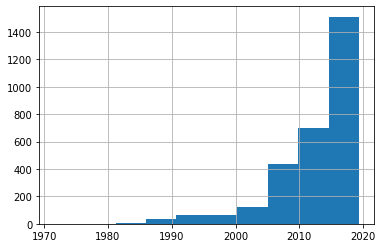

In [50]:
df_2019.HIRE_DT.hist();